<a href="https://colab.research.google.com/github/uday-1729/Programs/blob/main/CEST_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math

pi = math.pi


In [3]:
Pa = 0.98
Pb = 1 - Pa

omg = np.arange(-900 , 930 , 15)

dw = -480

wa = (omg-80)*2*pi
wb = (omg - dw)*2*pi

Ka = 1.5

Kb = 0.75

R1 = 1.7

R2 = 15

B1 = 20

M0 = np.zeros(shape=(7,1))
M0[0,0] =0.5
M0[3,0] = Pa
M0[6,0] = Pb

T_ex = 0.30


In [4]:
I_list = []
for x in range(0 , len(wa)):

  M =  np.array([[0 , 0 , 0 , 0 , 0 , 0 , 0],
      [0 ,(-R2-Ka), -(wa[x]) , 0 , Kb , 0 ,0 ],
      [0 , wa[x] , (-R2-Ka) , -20 , 0 , Kb , 0 ],
      [2*(R1*Pa) , 0 , 20 , (-R1-Ka) , 0 , 0 , Kb],
      [0 , 1.5 , 0 , 0 , (-R2-Kb) , -(wb[x]) , 0],
      [0 , 0 , 1.5 , 0 , wb[x] , (-R2-Kb) , -20],
      [2*(R1*Pb) , 0 , 0 , 0.75 , 0 , 20 , (-R1-Kb)]])

  Mt = sp.linalg.expm(M)# print(Mt)

  I = np.dot((Mt*T_ex) , M0)

  I0 = M0[3,0]

  I_fin = np.divide(I , I0)

  I_list.append(I_fin[3,0])


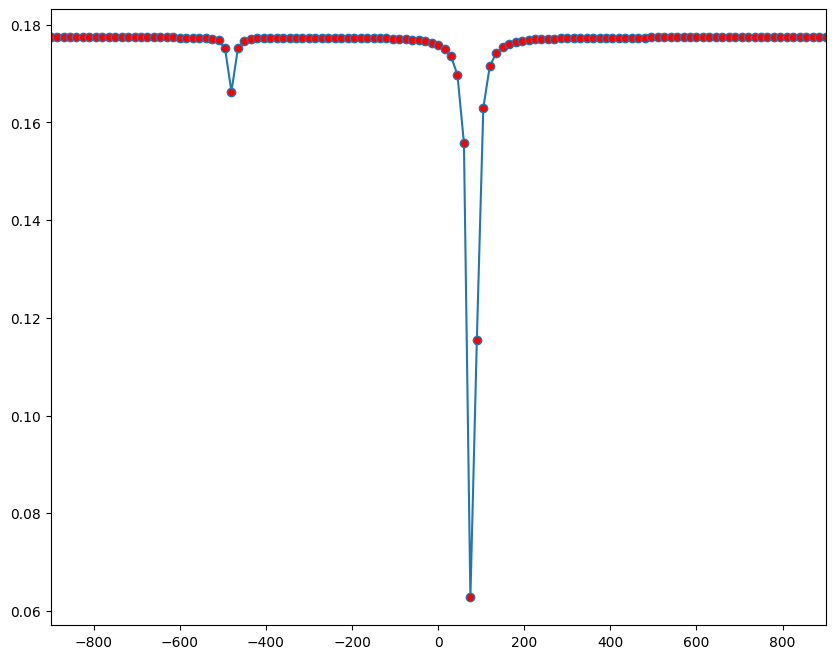

In [5]:
fig = plt.figure(figsize = (10 ,8))
plt.plot(omg , I_list , 'o-' , markerfacecolor = 'red')
plt.xlim(-900 , 900 )
plt.show()